<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>

<div class="note-box">
    <h2>👁️ Chapter 4: Object Detection with YOLO</h2>
    <p>
        Welcome to <strong>Notebook 04</strong>. In the previous chapter, we did <strong>Image Classification</strong> (assigning one label to a whole image, e.g., "This is a cat").
    </p>
    <p>
        Now we move to <strong>Object Detection</strong>. This is much harder because the model must answer two questions:
    </p>
    <ol>
        <li><strong>What</strong> is in the image? (Classification)</li>
        <li><strong>Where</strong> is it? (Localization / Bounding Box)</li>
    </ol>
    <p>
        We will use <strong>YOLOv8 (You Only Look Once)</strong>, a state-of-the-art model famous for its incredible speed and accuracy.
    </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>

<div class="note-box">
    <h2>⚙️ Part 1: Setup & Hardware</h2>
    <p>
        We use the <span class="code-inline">ultralytics</span> library, which makes using YOLO models extremely easy.
    </p>
    <p>
        <strong>Apple Silicon Note:</strong> YOLOv8 supports the <strong>MPS</strong> backend natively. We will confirm your GPU is active below.
    </p>
</div>

In [2]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# 1. Check Device
if torch.backends.mps.is_available():
    device = "mps"
    print("✅ Using Apple GPU (MPS backend)")
else:
    device = "cpu"
    print("⚠️ Using CPU")

✅ Using Apple GPU (MPS backend)


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    .note-box h3 {
        color: #f9e2af;                  /* Yellow Sub-Header */
        margin-top: 20px;
        margin-bottom: 10px;
        font-size: 1.2rem;
        font-weight: 600;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }

    /* Images */
    .note-box img {
        display: block;
        margin: 15px auto;
        max-width: 80%;
        border-radius: 8px;
        border: 1px solid #45475a;
    }
</style>

<div class="note-box">
    <h2>🧠 Theory: How Detection Works</h2>
    <p>
        Before we run the code, we need to understand two core concepts that make Object Detection possible.
    </p>
    
<h3>1. Anchor Boxes</h3>
    <p>
        In the early days, computers scanned every single pixel to find objects, which was incredibly slow.
    </p>
    <p>
        <strong>YOLO</strong> uses a smarter approach. It divides the image into a grid (e.g., 7x7). In each grid cell, it places pre-defined rectangles called <strong>Anchor Boxes</strong> of different shapes (tall and thin for a person, wide for a car).
    </p>
    
<p>
        The network doesn't predict a box from scratch; it predicts <em>how much to stretch or shift</em> these existing Anchor Boxes to fit the object it sees.
    </p>

<h3>2. IoU (Intersection over Union)</h3>
<p>
        How do we know if a prediction is "good"? We use <strong>IoU</strong>.
    </p>
    
<ul>
        <li><strong>Intersection:</strong> The area where the Predicted Box and the Truth Box overlap.</li>
        <li><strong>Union:</strong> The total area covered by both boxes combined.</li>
        <li><strong>IoU Score:</strong> Intersection ÷ Union.</li>
    </ul>
<p>
        An IoU of <strong>1.0</strong> is a perfect match. An IoU > 0.5 is usually considered a "correct" detection.
    </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    .note-box h3 {
        color: #f9e2af;                  /* Yellow Sub-Header */
        margin-top: 20px;
        margin-bottom: 10px;
        font-size: 1.2rem;
        font-weight: 600;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }

    /* Images */
    .note-box img {
        display: block;
        margin: 15px auto;
        max-width: 80%;
        border-radius: 8px;
        border: 1px solid #45475a;
    }
</style>
<div class="note-box">
    <h2>🚀 Part 2: Loading YOLOv8</h2>
    <p>
        We will load <strong>YOLOv8n</strong> (Nano). The "n" stands for Nano, which is the smallest and fastest version of the model, perfect for learning and running locally on laptops.
    </p>
    <p>
        The first time you run this, it will download the weights (about 6MB) automatically.
    </p>
</div>

In [15]:
# Load a pretrained YOLOv8n model
print("Loading Model...")
model = YOLO('yolov8m.pt')  # pretrained on COCO dataset (80 classes)

# Print model info
print("Model loaded successfully!")
print(model.info())

Loading Model...
Model loaded successfully!
YOLOv8m summary: 169 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs
(169, 25902640, 0, 79.3204224)


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    .note-box h3 {
        color: #f9e2af;                  /* Yellow Sub-Header */
        margin-top: 20px;
        margin-bottom: 10px;
        font-size: 1.2rem;
        font-weight: 600;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>

<div class="note-box">
    <h2>🧪 Part 3: Validating the Model</h2>
    <p>
        Now that we have tested on a single image, we need to measure the model's performance scientifically. We cannot just "look" at 1,000 images manually.
    </p>
    
<h3>1. The Dataset: COCO128</h3>
    <p>
        We will use <strong>COCO128</strong>, a small standard dataset containing the first <strong>128 images</strong> of the famous COCO (Common Objects in Context) dataset.
    </p>
    <ul>
        <li>It contains all <strong>80 classes</strong> (people, vehicles, animals, etc.).</li>
        <li>It acts as a "Sanity Check" to ensure our model pipeline is working correctly without downloading gigabytes of data.</li>
    </ul>

<h3>2. The Metrics: mAP (Mean Average Precision)</h3>
    <p>
        In Object Detection, simple "Accuracy" (like 95%) is not sufficient because we have to predict both <em>what</em> (Class) and <em>where</em> (Box). We use <strong>mAP</strong>:
    </p>
    <ul>
        <li><strong>mAP@50:</strong> The model is considered "correct" if the predicted box overlaps at least <strong>50%</strong> with the truth box. (This is a lenient score).</li>
        <li><strong>mAP@50-95:</strong> The "Gold Standard" metric. It averages the scores across 10 steps (50%, 55%, 60%... 95%). This rewards models that draw very tight, precise boxes.</li>
    </ul>
    <p>
        <strong>Note:</strong> The code below will automatically download the dataset and run the evaluation on your Apple GPU.
    </p>
</div>

In [22]:
from ultralytics import YOLO

# 1. Load the Model (Use 'yolov8n.pt' or 'yolov8m.pt')
# We recommend 'yolov8n.pt' for a fast test
model = YOLO('yolov8m.pt')

# 2. Run Validation
# data='coco128.yaml' tells YOLO to download the mini-dataset automatically
print("Downloading COCO128 and calculating accuracy...")



metrics = model.val(data='coco128.yaml', device='mps')
# 3. Print Key Metrics
# mAP50 = Accuracy when the box overlaps at least 50% with the real object
print("\n" + "="*30)
print(f"Mean Average Precision (mAP@50): {metrics.box.map50:.2%}")
print(f"Mean Average Precision (mAP@50-95): {metrics.box.map:.2%}")
print("="*30)

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.5.1 MPS (Apple M4)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 303.2±89.4 MB/s, size: 63.9 KB)
val: Scanning /Users/heliamirhosseini/Documents/Helia/AI_TA/AI_Course/chapter3/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 836.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 1.1it/s 7.3s1.0ss
                   all        128        929      0.712       0.73      0.784      0.614
                person         61        254       0.83       0.74      0.856      0.654
               bicycle          3          6          1      0.625      0.789      0.579
                   car         12         46      0.757      0.339      0.533      0.313
            motorcycle          4          5      0.761          1      0.962     

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    .note-box h3 {
        color: #f9e2af;                  /* Yellow Sub-Header */
        margin-top: 20px;
        margin-bottom: 10px;
        font-size: 1.2rem;
        font-weight: 600;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }

    /* Images */
    .note-box img {
        display: block;
        margin: 15px auto;
        max-width: 80%;
        border-radius: 8px;
        border: 1px solid #45475a;
    }
</style>

<div class="note-box">
    <h2>🏆 Challenge</h2>
    <p>
        Try uploading your own photo!
    </p>
    <p>
        1. Drag and drop a photo into the file browser on the left.
        <br>
        2. Change the code: <span class="code-inline">image = Image.open("your_photo.jpg")</span>
        <br>
        3. Run the inference cell again.
    </p>
    <p>
        <strong>Question to ponder:</strong> Does the model struggle with small objects in the background? This is a common limitation of the "Nano" model compared to the larger "Large" (yolov8l.pt) model.
    </p>
</div>

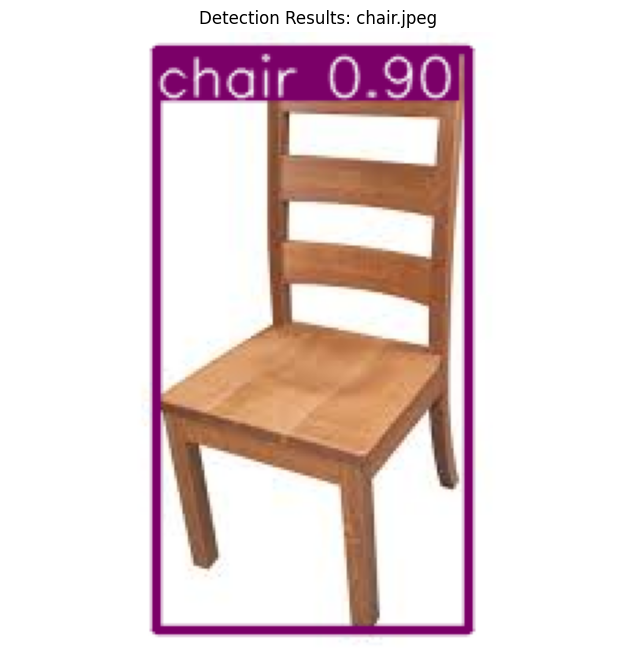

🎉 Success! Detected 1 objects.


In [17]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1. Load Model
model = YOLO('yolov8m.pt')

# 2. SELECT YOUR IMAGE
# Change this to the exact name of the photo you dragged into the sidebar
image_path = "chair.jpeg" 

# 3. Run Inference
try:
    # Read image
    img = cv2.imread(image_path)
    
    # Check if image loaded correctly
    if img is None:
        print(f"❌ Error: Could not find file named '{image_path}'. Check the name!")
    else:
        # Run YOLO
        results = model.predict(source=img, conf=0.25, device=device, verbose=False)
        
        # Visualize
        res_plotted = results[0].plot()
        res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(res_rgb)
        plt.axis('off')
        plt.title(f"Detection Results: {image_path}")
        plt.show()
        
        print(f"🎉 Success! Detected {len(results[0].boxes)} objects.")
        
except Exception as e:
    print(f"An error occurred: {e}")